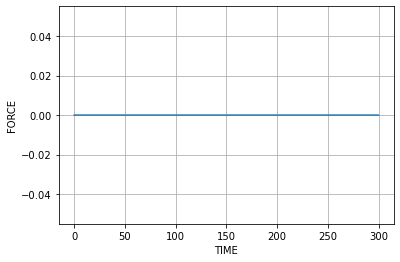

In [1]:
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
from sympy import * 
from spring_damp import spring_damp_mass

force_sin = sin
sdm_sin = spring_damp_mass(state_vec=[1,0], time_in_sec=300, mass=10, K=2,B=0, delta_mass = 0,delta_K = 0, delta_B = 0, force=force_sin, amplitude=0, omega = 0.5)
sdm_sin.force_graph()

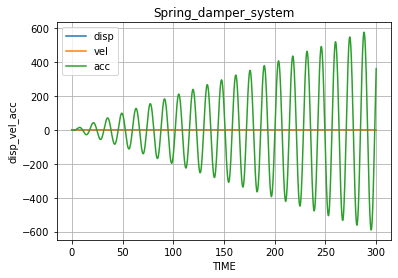

In [2]:
k = sdm_sin.ideal_graph()


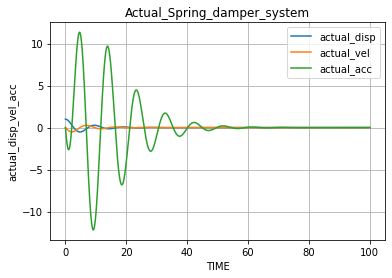

In [8]:
sdm_sin.actual_graph()

In [9]:
df = sdm_sin.actual_values_csv()
df.to_csv("Trial_Simulation.csv", index = False)

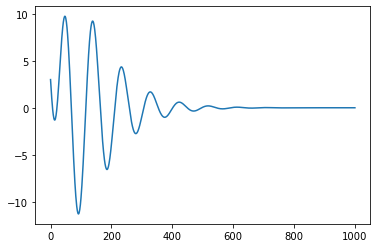

In [10]:
e = sdm_sin.error_equation()
plt.plot(e)